<h1 style='color:purple' align='center'> Predicting Survival From Titanic Crash</h1>

# Objective : Titanic Crash  Survived Classification

# Exploratory Data Analysis (EDA) - Python

# Insights - Patterns

# Classification (Using the ML)

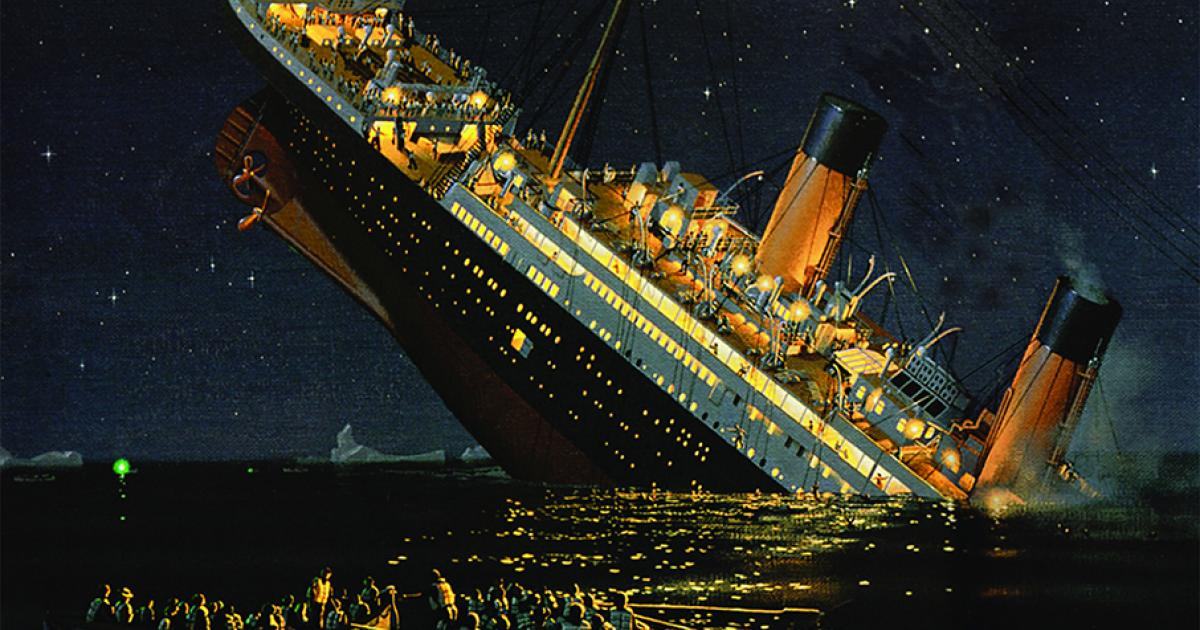

# 1. Load Python Modules

In [63]:
#  Use Python's import statement to load modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tabulate import tabulate

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

# 2. Read the Dataset from CSV file  - Using Pandas

In [64]:
file_path=r"Titanic_Dataset.csv"
titanic_df = pd.read_csv(file_path)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
#drop - sensitive - non imp columns
titanic_df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


# 3. Basic Inspection on given dataset

In [66]:
def basic_inspection_dataset(table):
    """Generates a basic inspection dataset from the given table."""
    
    print("top 5 rows - using head")
    print(table.head())
    print()
        
    print("bottom 5 rows using tail")
    print(table.tail())
    print()
        
    print("numbers of samples and columns")
    print(table.shape)
    print()
    
    print("numbers of samples ")
    print(len(table))
    print()
    
    print("numbers of entries in the data frame")
    print(table.size)
    print()
    
    print("Columns Names")
    print(table.columns)
    print()

    print("Columns dtypes")
    print(table.dtypes)
    print()
    
    print("Dataframe info")
    print(table.info())
    print()
    
    print()
    print("check the missing value in each column")
    print(table.isnull().sum())
          
    print()
    print("check the missing value in each column")
    print(table.isna().sum())

basic_inspection_dataset(titanic_df)

top 5 rows - using head
   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0         0       3    male  22.0      1      0   7.2500   NaN        S
1         1       1  female  38.0      1      0  71.2833   C85        C
2         1       3  female  26.0      0      0   7.9250   NaN        S
3         1       1  female  35.0      1      0  53.1000  C123        S
4         0       3    male  35.0      0      0   8.0500   NaN        S

bottom 5 rows using tail
     Survived  Pclass     Sex   Age  SibSp  Parch   Fare Cabin Embarked
886         0       2    male  27.0      0      0  13.00   NaN        S
887         1       1  female  19.0      0      0  30.00   B42        S
888         0       3  female   NaN      1      2  23.45   NaN        S
889         1       1    male  26.0      0      0  30.00  C148        C
890         0       3    male  32.0      0      0   7.75   NaN        Q

numbers of samples and columns
(891, 9)

numbers of samples 
891

numbers of entries 

In [67]:
#drop - due to huge null values and non imp features
titanic_df.drop(['Cabin','Embarked'],axis=1,inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


# 4. Handling Missing Values - Cat - Variables

In [68]:
# No Missing Values - I am skipping this section
titanic_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [69]:
## conver to cat - object data type
titanic_df["Pclass"]=titanic_df["Pclass"].astype("object")
titanic_df["Survived"]=titanic_df["Survived"].astype("object")
titanic_df["SibSp"]=titanic_df["SibSp"].astype("object")
titanic_df["Parch"]=titanic_df["Parch"].astype("object")


In [70]:
titanic_df.dtypes

Survived     object
Pclass       object
Sex          object
Age         float64
SibSp        object
Parch        object
Fare        float64
dtype: object

# 5. Categorical- Variable - Analysis -Using Pipeline

In [71]:
class BarPieChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        cat_cols = df.select_dtypes(include='object').columns
        for cat_name in cat_cols:
            value_counts = df[cat_name].value_counts().reset_index()
            # Rename the columns
            value_counts.columns = ['Class', 'Frequency']

            # Print the result as a table
            print(f"{cat_name} frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Calculate relative frequency
            total_count = value_counts['Frequency'].sum()
            value_counts['Relative Frequency %'] = round((value_counts['Frequency'] / total_count)*100,2)

            # Print the result as a table
            print(f"{cat_name} Relative frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Extract the values and index from value counts
            value_counts = df[cat_name].value_counts()
            values = value_counts.values
            labels = value_counts.index

            fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
            # Create a bar graph
            axs[0].bar(labels, values)
            axs[0].set_title(f'Frequency of {cat_name}')
            axs[0].set_xlabel('Categories')  # Set x-label
            axs[0].set_ylabel('Count')       # Set y-label

            axs[1].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
            axs[1].set_title(f'Relative Frequency of {cat_name}')
            plt.tight_layout()
            # Show the plot
            plt.show()  
        
        

Survived frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |   0   |    549    |
| 1 |   1   |    342    |
+---+-------+-----------+
Survived Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  0.0  |   549.0   |        61.62         |
| 1 |  1.0  |   342.0   |        38.38         |
+---+-------+-----------+----------------------+


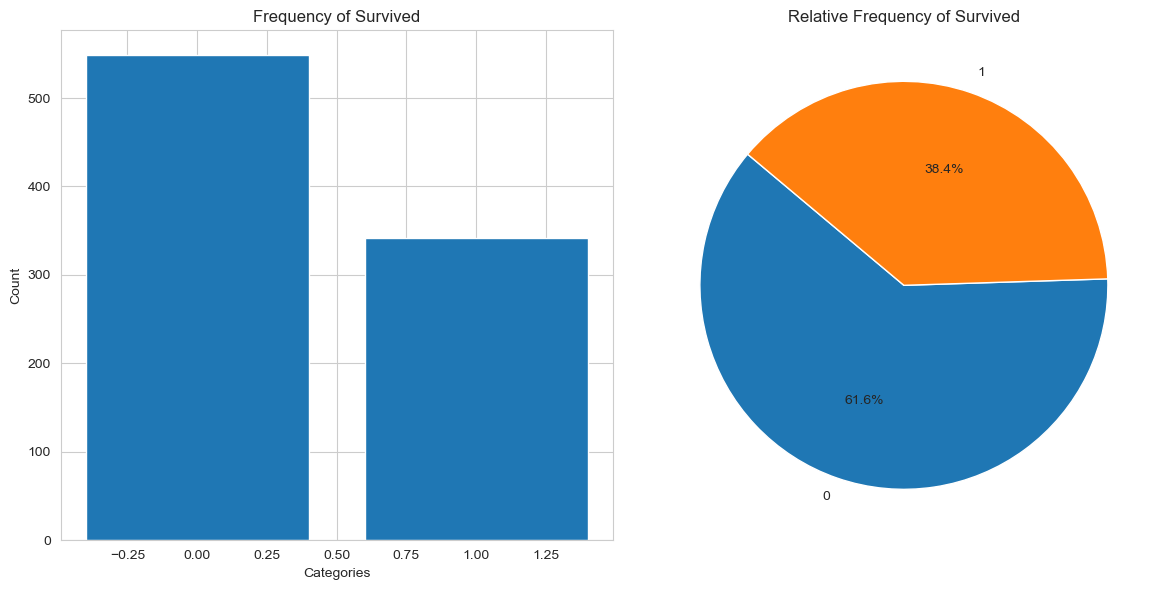

Pclass frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |   3   |    491    |
| 1 |   1   |    216    |
| 2 |   2   |    184    |
+---+-------+-----------+
Pclass Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  3.0  |   491.0   |        55.11         |
| 1 |  1.0  |   216.0   |        24.24         |
| 2 |  2.0  |   184.0   |        20.65         |
+---+-------+-----------+----------------------+


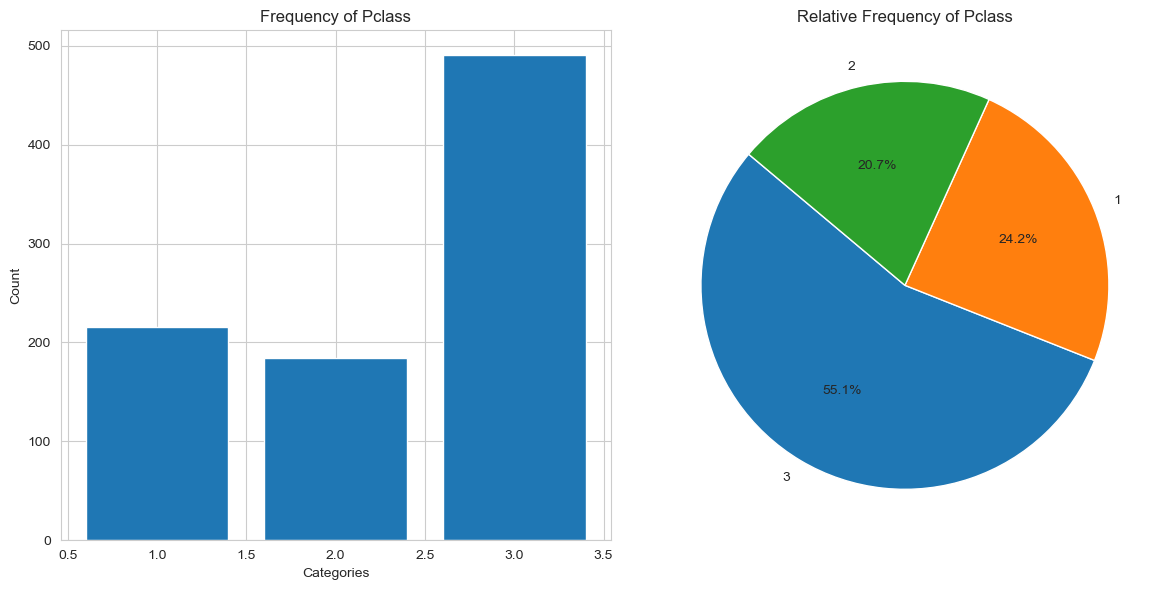

Sex frequency table
+---+--------+-----------+
|   | Class  | Frequency |
+---+--------+-----------+
| 0 |  male  |    577    |
| 1 | female |    314    |
+---+--------+-----------+
Sex Relative frequency table
+---+--------+-----------+----------------------+
|   | Class  | Frequency | Relative Frequency % |
+---+--------+-----------+----------------------+
| 0 |  male  |    577    |        64.76         |
| 1 | female |    314    |        35.24         |
+---+--------+-----------+----------------------+


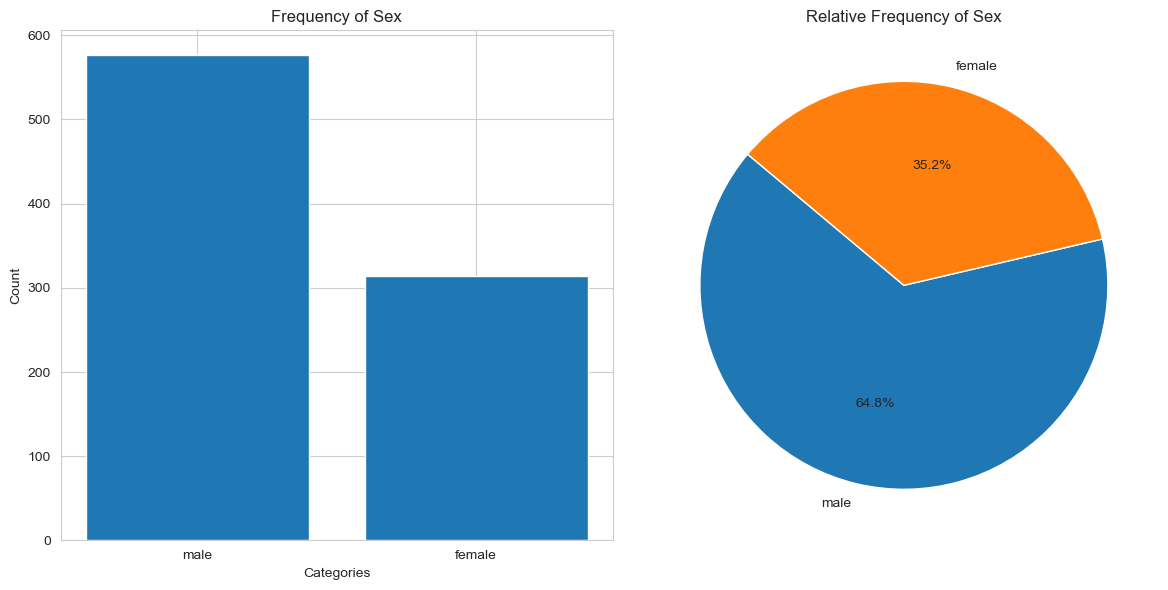

SibSp frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |   0   |    608    |
| 1 |   1   |    209    |
| 2 |   2   |    28     |
| 3 |   4   |    18     |
| 4 |   3   |    16     |
| 5 |   8   |     7     |
| 6 |   5   |     5     |
+---+-------+-----------+
SibSp Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  0.0  |   608.0   |        68.24         |
| 1 |  1.0  |   209.0   |        23.46         |
| 2 |  2.0  |   28.0    |         3.14         |
| 3 |  4.0  |   18.0    |         2.02         |
| 4 |  3.0  |   16.0    |         1.8          |
| 5 |  8.0  |    7.0    |         0.79         |
| 6 |  5.0  |    5.0    |         0.56         |
+---+-------+-----------+----------------------+


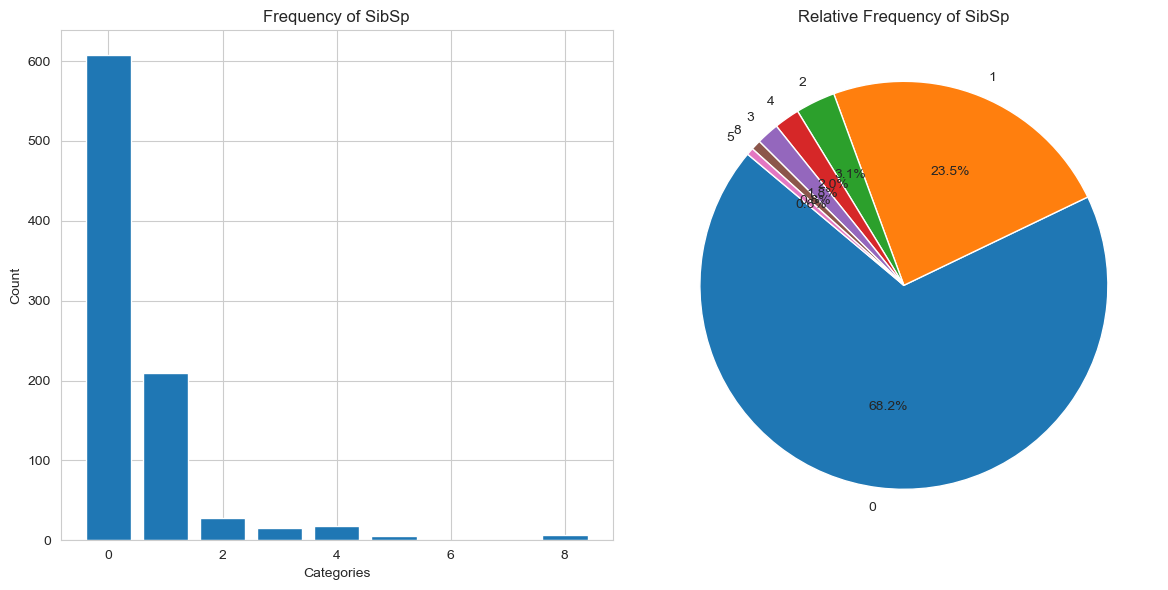

Parch frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |   0   |    678    |
| 1 |   1   |    118    |
| 2 |   2   |    80     |
| 3 |   5   |     5     |
| 4 |   3   |     5     |
| 5 |   4   |     4     |
| 6 |   6   |     1     |
+---+-------+-----------+
Parch Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  0.0  |   678.0   |        76.09         |
| 1 |  1.0  |   118.0   |        13.24         |
| 2 |  2.0  |   80.0    |         8.98         |
| 3 |  5.0  |    5.0    |         0.56         |
| 4 |  3.0  |    5.0    |         0.56         |
| 5 |  4.0  |    4.0    |         0.45         |
| 6 |  6.0  |    1.0    |         0.11         |
+---+-------+-----------+----------------------+


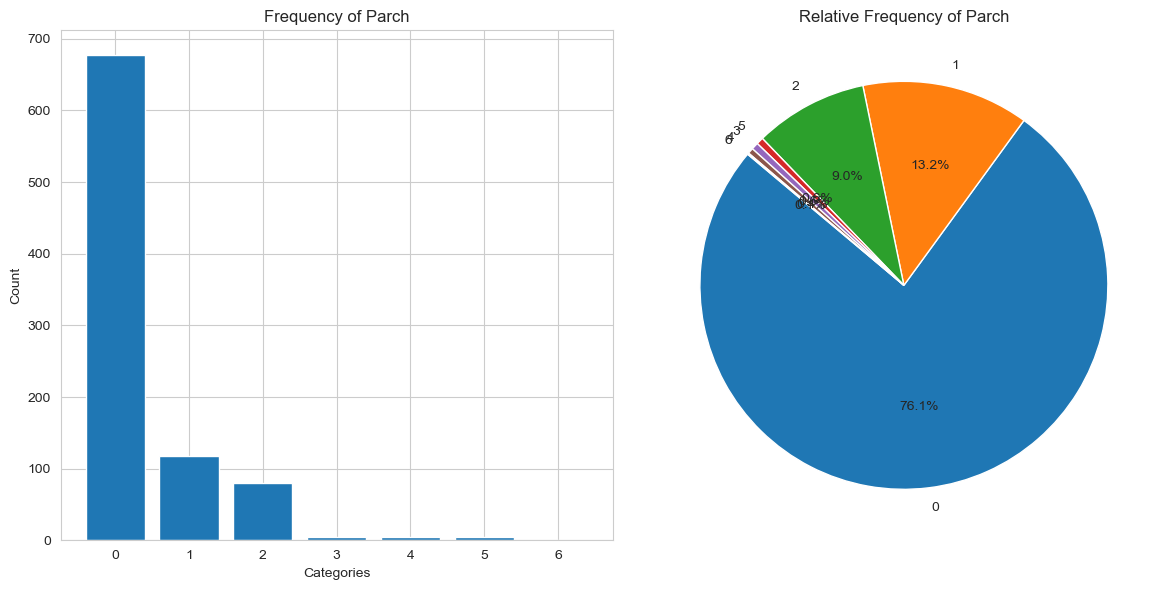

In [72]:
pipeline_cat_var = Pipeline([
    ('bar_pie_chart', BarPieChartTransformer())
])


# Fit and transform your data using the pipeline
processed_data = pipeline_cat_var.fit_transform(titanic_df)

# 6. Handling Missing Values in Numerical Columns

In [73]:
titanic_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [74]:
#filling with mean/median
titanic_df["Age"] = titanic_df["Age"].fillna(titanic_df["Age"].median())
titanic_df.head()
titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

# 7. Numerical - Variables - Analysis - Using -Pipeline

In [75]:
class HistBoxChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        num_cols = df.select_dtypes(exclude='object').columns
        for con_var in num_cols:
                        
            # Create a figure and axes object
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))

            # Plot histogram without KDE on the left
            axes[0].hist(df[con_var],  color='skyblue', edgecolor='black')
            axes[0].set_xlabel('Value')
            axes[0].set_ylabel('Frequency')
            axes[0].set_title(f'Histogram {con_var}')

            # Plot histogram with KDE on the right
            sns.histplot(data=df, x=con_var, kde=True, color='orange', edgecolor='black', ax=axes[1])
            axes[1].set_xlabel('Value')
            axes[1].set_ylabel('Density')
            axes[1].set_title('Histogram with KDE')

            # Adjust layout
            plt.tight_layout()

            # Show the combined plot
            plt.show()

        
        

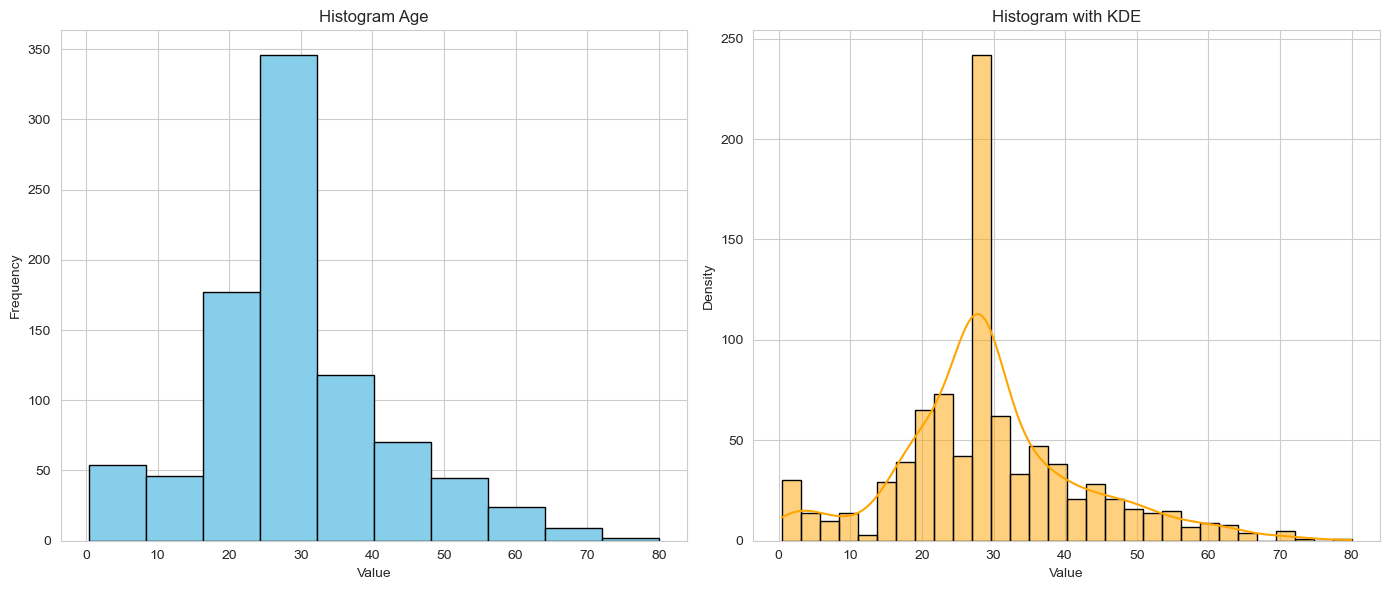

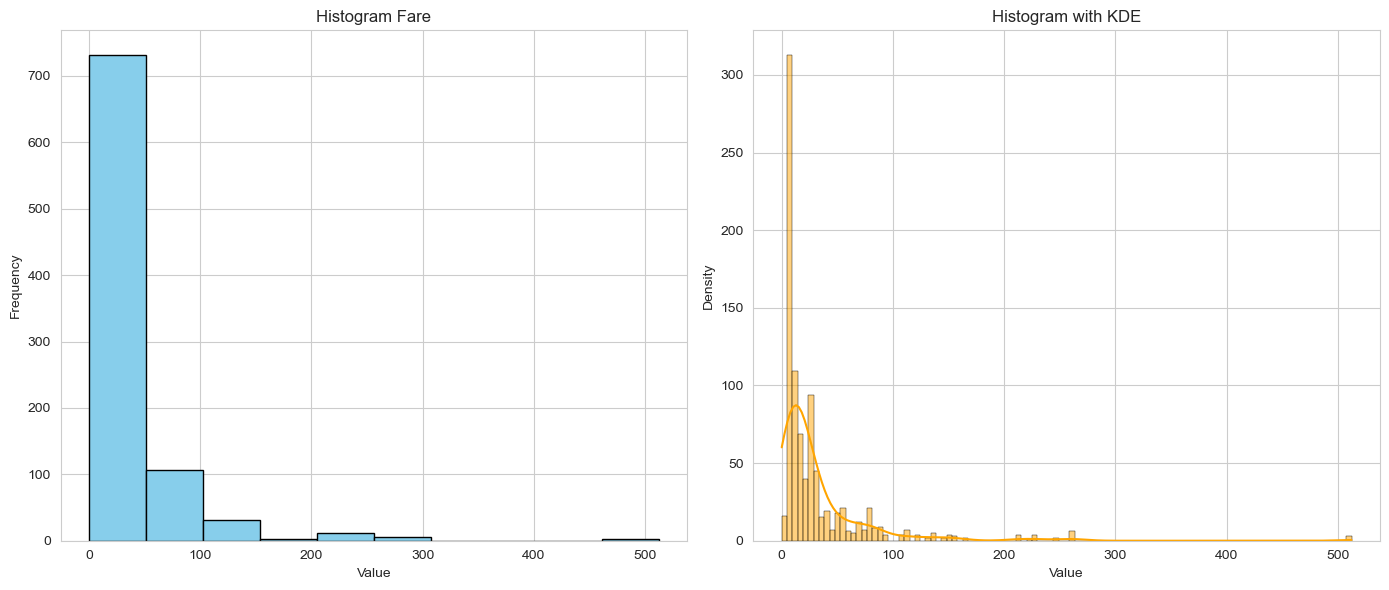

In [76]:
pipeline_num_var = Pipeline([
    ('hist_box_chart', HistBoxChartTransformer())
])


# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(titanic_df)

# 8. Numerical - Variables -Outliers Analysis

In [77]:
titanic_df.select_dtypes(exclude="object").columns


Index(['Age', 'Fare'], dtype='object')

# 9. Bi Variate Analyis

In [78]:
cat_vars = titanic_df.select_dtypes(include="object").columns
cat_vars

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch'], dtype='object')

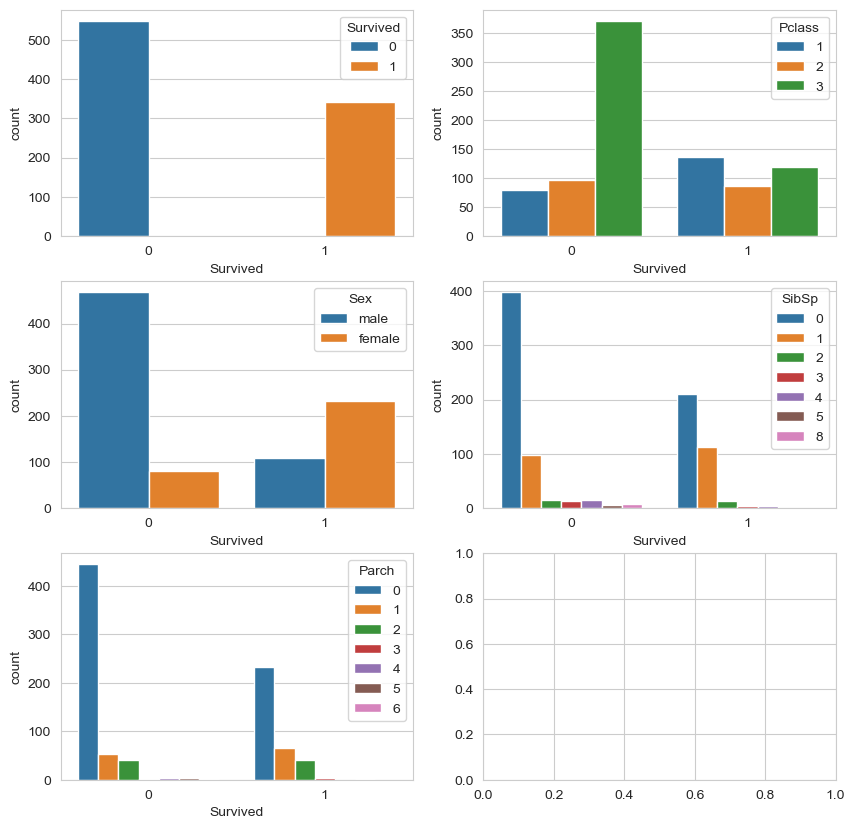

In [79]:
## Cat Vs Cat
output_var="Survived"
fig,ax = plt.subplots(3,2,figsize=(10,10))
for axi,x in zip(ax.flat,cat_vars):
    sns.countplot(x=output_var,hue=x,ax=axi , data=titanic_df)

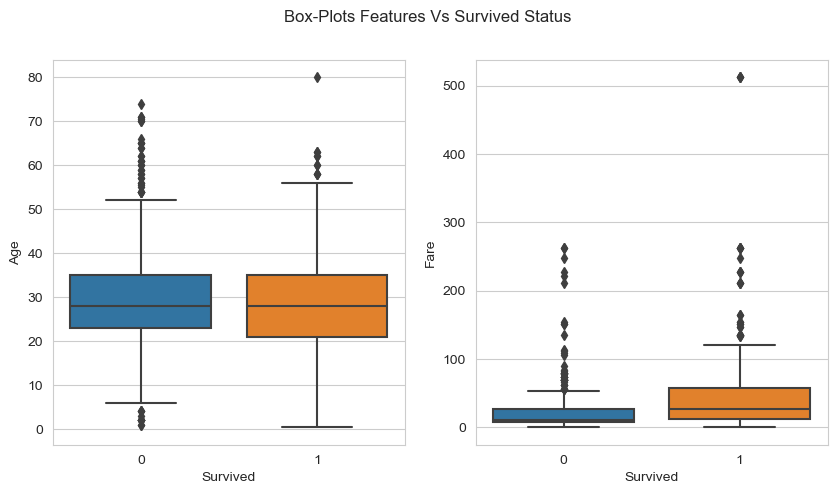

In [80]:
num_vars = ['Age', 'Fare']
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Box-Plots Features Vs Survived Status')
sns.boxplot(ax=axes[0], x=output_var,y='Age', data=titanic_df)
sns.boxplot(ax=axes[1], x=output_var,y='Fare', data=titanic_df)
plt.show()

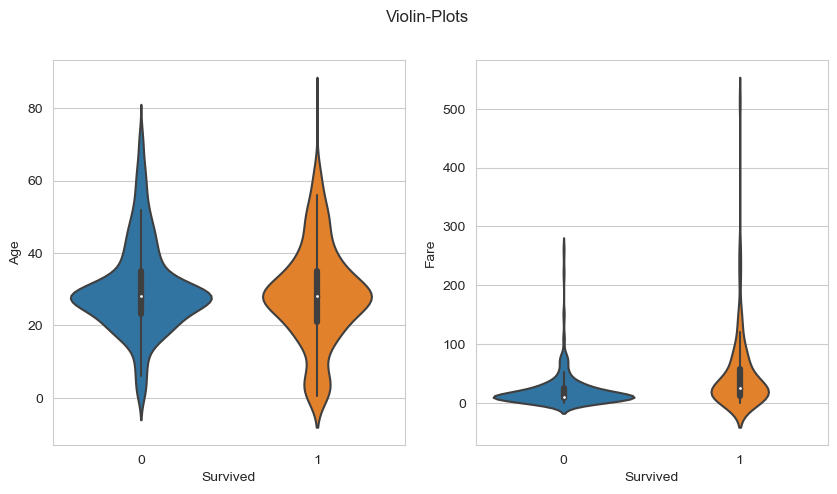

In [81]:
num_vars = ['Age', 'Fare']
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Violin-Plots')
sns.violinplot(ax=axes[0], x=output_var,y='Age', data=titanic_df)
sns.violinplot(ax=axes[1], x=output_var,y='Fare', data=titanic_df)
plt.show()

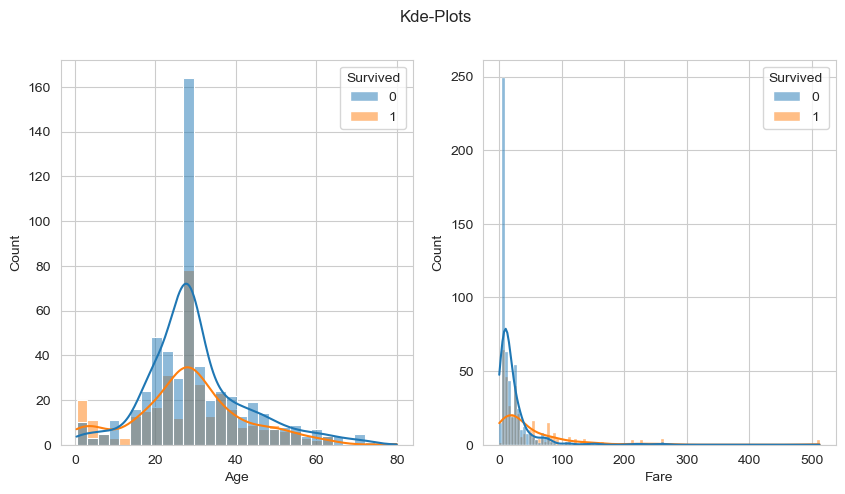

In [82]:
num_vars = ['Age', 'Fare']
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Kde-Plots')
sns.histplot(ax=axes[0], hue=output_var,x='Age', data=titanic_df,kde=True)
sns.histplot(ax=axes[1], hue=output_var,x='Fare', data=titanic_df,kde=True)
plt.show()

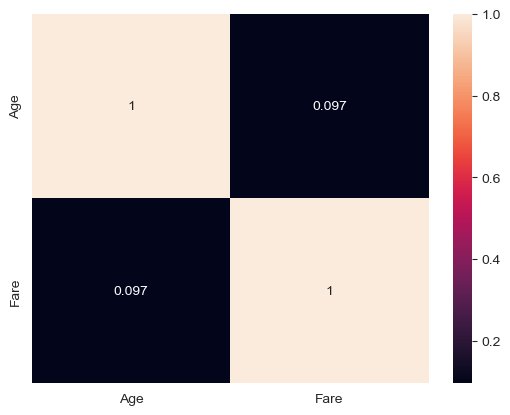

In [83]:
corr_mat=titanic_df.corr(numeric_only=True)
sns.heatmap(corr_mat,annot=True)
plt.show()

# 10. Data Transformation

In [84]:
titanic_df["Age_log"]=np.log1p(titanic_df["Age"])
titanic_df["Fare_log"]=np.log1p(titanic_df["Fare"])

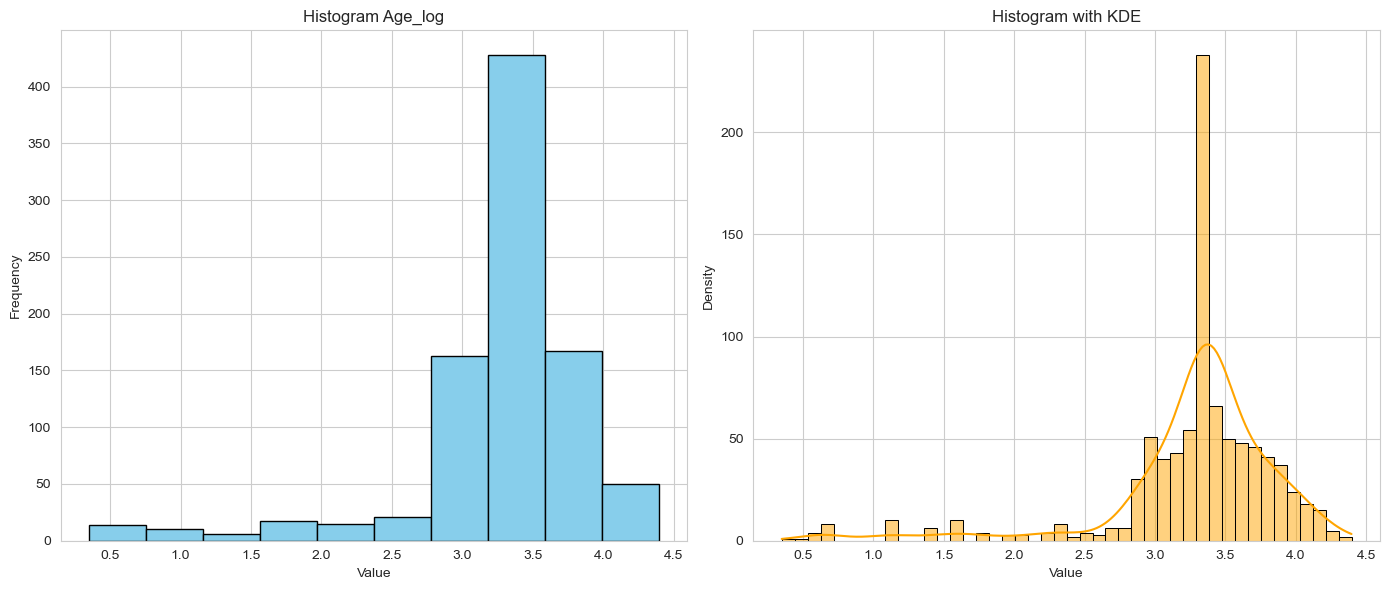

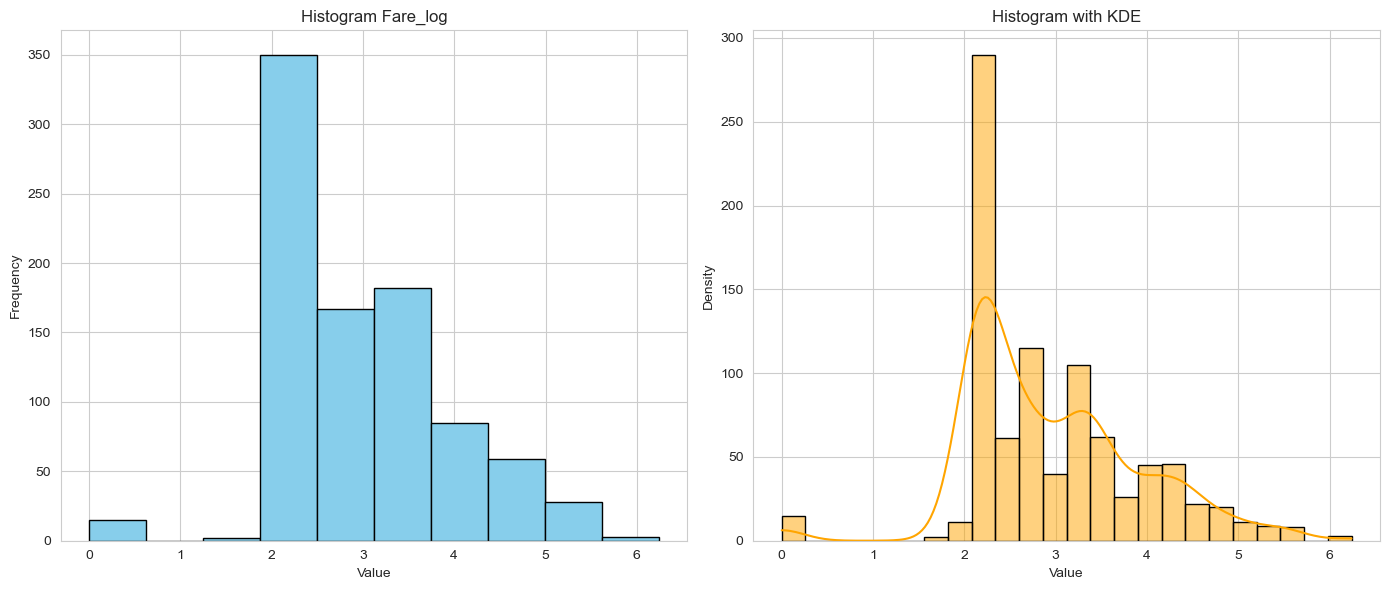

In [85]:
titanic_num_df = titanic_df[['Age_log','Fare_log']].copy()
# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(titanic_num_df)

In [86]:
titanic_df["Age_sqrt"]=np.sqrt(titanic_df["Age"])
titanic_df["Fare_sqrt"]=np.sqrt(titanic_df["Fare"])

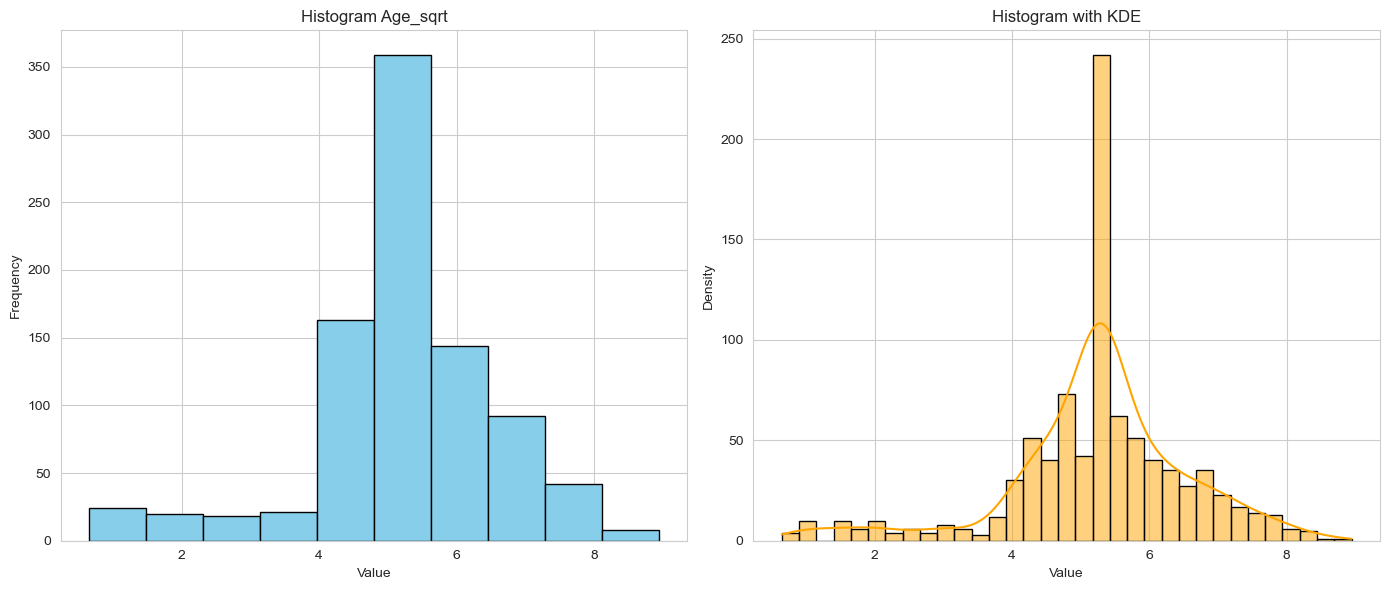

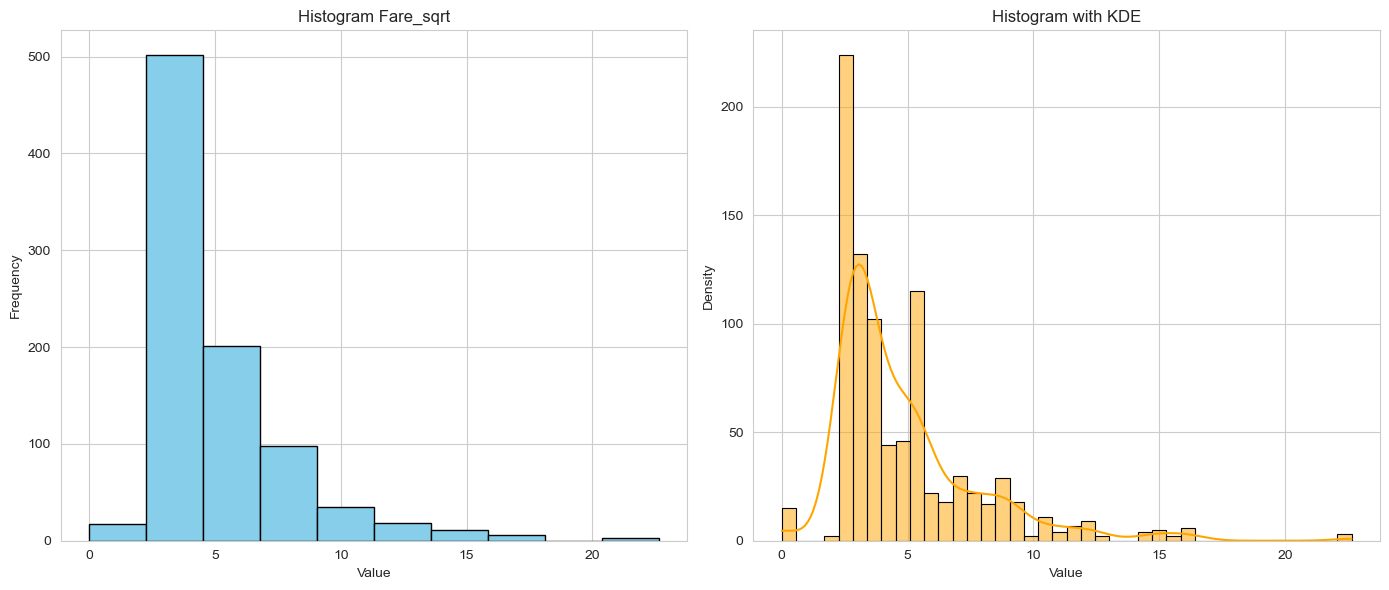

In [87]:
titanic_num_df = titanic_df[['Age_sqrt','Fare_sqrt']].copy()
# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(titanic_num_df)

# 11. Standization - Normalization

In [88]:
scaler = StandardScaler()

# Fit and transform the scaler on the selected column
scaled_column = scaler.fit_transform(titanic_df[['Age_sqrt','Fare_sqrt']])

# Replace the original column with the scaled column
titanic_df[['Age_sqrt_stand','Fare_sqrt_stand']] = scaled_column
print(titanic_df)

    Survived Pclass     Sex   Age SibSp Parch     Fare   Age_log  Fare_log  \
0          0      3    male  22.0     1     0   7.2500  3.135494  2.110213   
1          1      1  female  38.0     1     0  71.2833  3.663562  4.280593   
2          1      3  female  26.0     0     0   7.9250  3.295837  2.188856   
3          1      1  female  35.0     1     0  53.1000  3.583519  3.990834   
4          0      3    male  35.0     0     0   8.0500  3.583519  2.202765   
..       ...    ...     ...   ...   ...   ...      ...       ...       ...   
886        0      2    male  27.0     0     0  13.0000  3.332205  2.639057   
887        1      1  female  19.0     0     0  30.0000  2.995732  3.433987   
888        0      3  female  28.0     1     2  23.4500  3.367296  3.196630   
889        1      1    male  26.0     0     0  30.0000  3.295837  3.433987   
890        0      3    male  32.0     0     0   7.7500  3.496508  2.169054   

     Age_sqrt  Fare_sqrt  Age_sqrt_stand  Fare_sqrt_stand  
0  

# 12. Convert Cat - to - Numerical Columns

In [89]:
titanic_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Age_log',
       'Fare_log', 'Age_sqrt', 'Fare_sqrt', 'Age_sqrt_stand',
       'Fare_sqrt_stand'],
      dtype='object')

In [90]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for var in ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']:
    titanic_df[var]=le.fit_transform(titanic_df[var])

In [91]:
titanic_df[output_var].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

# 13. SMOTE for Balancing Data

In [92]:
Y=titanic_df["Survived"]
X=titanic_df[[ 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',  'Age_sqrt_stand', 'Fare_sqrt_stand']]
print(X.columns)
print(len(Y),len(X))

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Age_sqrt_stand',
       'Fare_sqrt_stand'],
      dtype='object')
891 891


In [93]:
X, Y = SMOTE().fit_resample(X, Y)
print(X.columns)
print(len(Y),len(X))

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Age_sqrt_stand',
       'Fare_sqrt_stand'],
      dtype='object')
1098 1098


In [94]:
Y.value_counts()

Survived
0    549
1    549
Name: count, dtype: int64

# ML Models

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state = 42)

In [96]:
def draw_heatmap(conf_matrix):
    sns.heatmap(conf_matrix, annot=True)
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.title('Confusion Matrix')
    plt.show()

## Logistic Regression 

Model - Logistic Regression
accuracy train score overall : 0.8211845102505695
accuracy test score overall : 0.8409090909090909
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       103
           1       0.83      0.88      0.85       117

    accuracy                           0.84       220
   macro avg       0.84      0.84      0.84       220
weighted avg       0.84      0.84      0.84       220

[[ 82  21]
 [ 14 103]]


C:\Users\91956\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


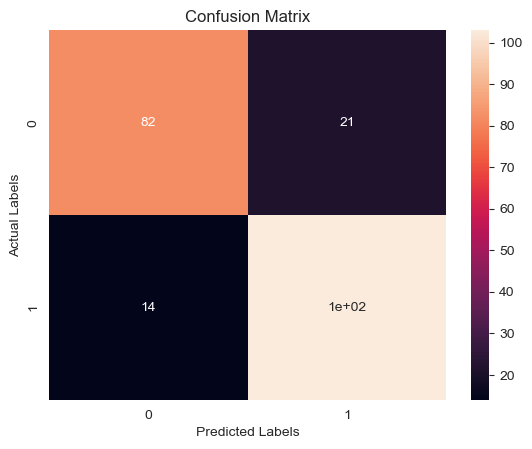

In [97]:
lg_model = LogisticRegression(solver='saga', max_iter=500, random_state=42)
lg_model.fit(X_train, Y_train)

print("Model - Logistic Regression")
score = lg_model.score(X_train, Y_train)
print('accuracy train score overall :', score)
score = lg_model.score(X_test, Y_test)
print('accuracy test score overall :', score)

y_pred = lg_model.predict(X_test)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## GaussianNB

Model-GaussianNB
train score 0.8029612756264237
test score 0.8409090909090909
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       103
           1       0.83      0.88      0.85       117

    accuracy                           0.84       220
   macro avg       0.84      0.84      0.84       220
weighted avg       0.84      0.84      0.84       220

[[ 82  21]
 [ 14 103]]


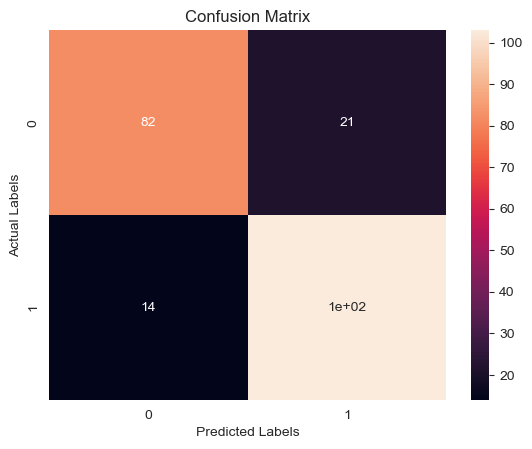

In [98]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB
gnb_model = GaussianNB()
gnb_model.fit(X_train,Y_train)

print("Model-GaussianNB")
print("train score",gnb_model.score(X_train,Y_train))
print("test score",gnb_model.score(X_test,Y_test))

y_pred = gnb_model.predict(X_test)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

# Suport Vector Machine - Classifier

model-Suport Vector Machine - kernel - linear -Classifier
Train Accuracy: 0.8132118451025057
Test Accuracy: 0.8545454545454545
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       103
           1       0.88      0.84      0.86       117

    accuracy                           0.85       220
   macro avg       0.85      0.86      0.85       220
weighted avg       0.86      0.85      0.85       220

[[90 13]
 [19 98]]


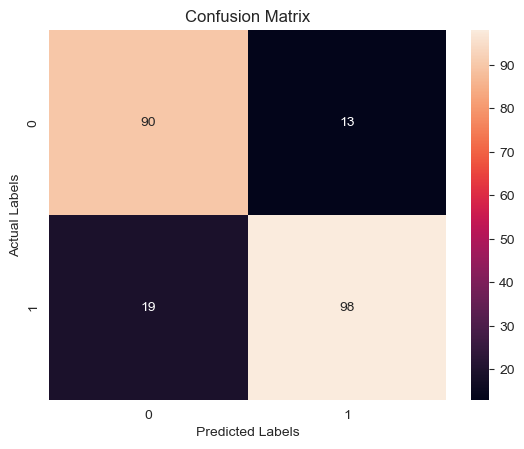

In [99]:
from sklearn.svm import SVC
# Initialize the SVM classifier
svm_linear_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_linear_classifier.fit(X_train, Y_train)
print("model-Suport Vector Machine - kernel - linear -Classifier")

y_pred = svm_linear_classifier.predict(X_train)
# Calculate the accuracy of the model
accuracy = accuracy_score(Y_train, y_pred)
print("Train Accuracy:", accuracy)

# Predict the classes for test set
y_pred = svm_linear_classifier.predict(X_test)
# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Test Accuracy:", accuracy)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

model-Suport Vector Machine - Kernel -rbf - Classifier
Train Accuracy: 0.6981776765375854
Test Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.67      0.92      0.78       103
           1       0.90      0.60      0.72       117

    accuracy                           0.75       220
   macro avg       0.78      0.76      0.75       220
weighted avg       0.79      0.75      0.74       220

[[95  8]
 [47 70]]


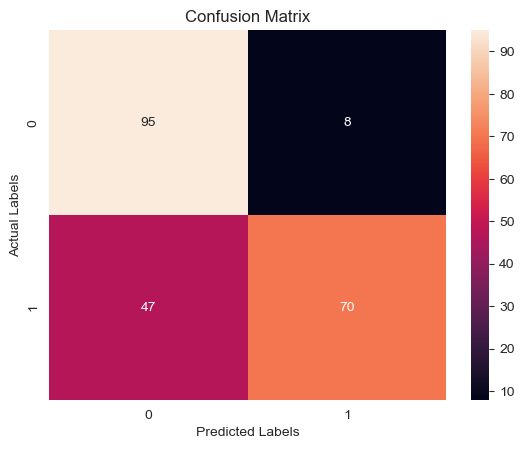

In [100]:
svm_rbf_classifier = SVC(kernel='rbf', random_state=42)

# Train the SVM classifier
svm_rbf_classifier.fit(X_train, Y_train)
print("model-Suport Vector Machine - Kernel -rbf - Classifier")
y_pred = svm_rbf_classifier.predict(X_train)
# Calculate the accuracy of the model
accuracy = accuracy_score(Y_train, y_pred)
print("Train Accuracy:", accuracy)

# Predict the classes for test set
y_pred = svm_rbf_classifier.predict(X_test)
# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Test Accuracy:", accuracy)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

model-Suport Vector Machine - Kernel -poly - Classifier
Train Accuracy: 0.7129840546697038
Test Accuracy: 0.740909090909091
              precision    recall  f1-score   support

           0       0.74      0.69      0.71       103
           1       0.74      0.79      0.76       117

    accuracy                           0.74       220
   macro avg       0.74      0.74      0.74       220
weighted avg       0.74      0.74      0.74       220

[[71 32]
 [25 92]]


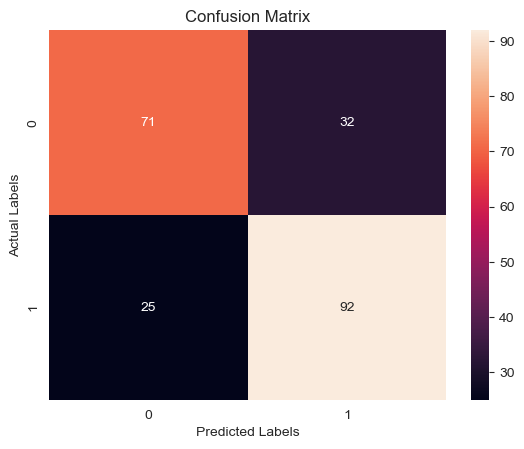

In [101]:
svm_poly_classifier = SVC(kernel='poly', random_state=42)

# Train the SVM classifier
svm_poly_classifier.fit(X_train, Y_train)
print("model-Suport Vector Machine - Kernel -poly - Classifier")

y_pred = svm_poly_classifier.predict(X_train)
# Calculate the accuracy of the model
accuracy = accuracy_score(Y_train, y_pred)
print("Train Accuracy:", accuracy)

# Predict the classes for test set
y_pred = svm_poly_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Test Accuracy:", accuracy)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## Decision Tree

Model-Decion Tree
train score: 0.8678815489749431
test score: 0.8863636363636364
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       103
           1       0.93      0.85      0.89       117

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220

[[ 95   8]
 [ 17 100]]


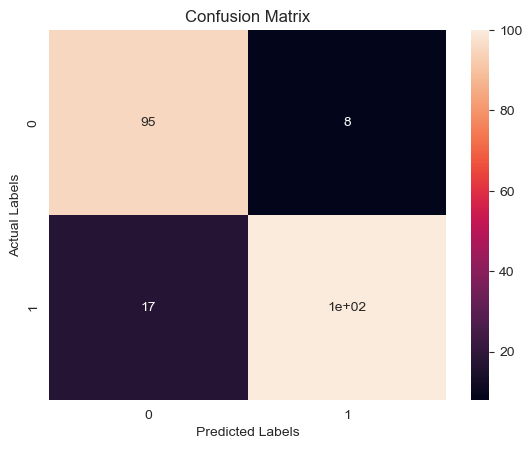

In [102]:
dt_clf = DecisionTreeClassifier(max_leaf_nodes=20,random_state=42)
dt_clf.fit(X_train, Y_train)
print("Model-Decion Tree")

accuracy=dt_clf.score(X_train, Y_train)
print(f"train score: {accuracy}")

accuracy=dt_clf.score(X_test, Y_test)
print(f"test score: {accuracy}")

y_pred=dt_clf.predict(X_test)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## Radom Forest

Model- Random Forest Tree
train score: 0.8815489749430524
test score: 0.9
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       103
           1       0.89      0.93      0.91       117

    accuracy                           0.90       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.90      0.90      0.90       220

[[ 89  14]
 [  8 109]]


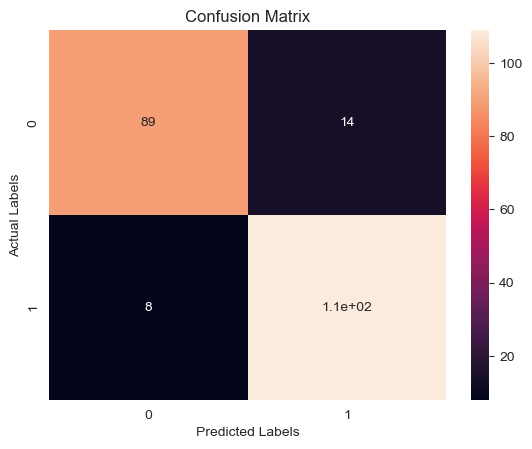

In [103]:
rf_clf= RandomForestClassifier(n_estimators = 1000, random_state = 42, max_leaf_nodes=20)
rf_clf.fit(X_train, Y_train)
print("Model- Random Forest Tree")

accuracy=rf_clf.score(X_train, Y_train)
print(f"train score: {accuracy}")

accuracy=rf_clf.score(X_test, Y_test)
print(f"test score: {accuracy}")

y_pred=rf_clf.predict(X_test)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## AdaBoost 

Model-AdaBoost
train score 0.8428246013667426
test score: 0.8636363636363636
              precision    recall  f1-score   support

           0       0.91      0.79      0.84       103
           1       0.83      0.93      0.88       117

    accuracy                           0.86       220
   macro avg       0.87      0.86      0.86       220
weighted avg       0.87      0.86      0.86       220

[[ 81  22]
 [  8 109]]


C:\Users\91956\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


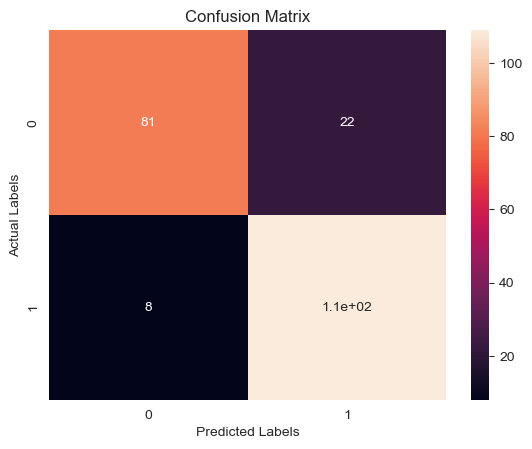

In [104]:
base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost_clf = AdaBoostClassifier( n_estimators=50, random_state=42)

# Train the AdaBoost classifier
adaboost_clf.fit(X_train, Y_train)

print("Model-AdaBoost")
print("train score",adaboost_clf.score(X_train, Y_train))

# Predict on the test set
y_pred = adaboost_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f"test score: {accuracy}")

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## GradientBoostingClassifier

model-Gradient Boosting Classifier
Train Accuracy: 0.7927107061503417
Test Accuracy: 0.8363636363636363
              precision    recall  f1-score   support

           0       0.91      0.79      0.84       103
           1       0.83      0.93      0.88       117

    accuracy                           0.86       220
   macro avg       0.87      0.86      0.86       220
weighted avg       0.87      0.86      0.86       220

[[ 81  22]
 [  8 109]]


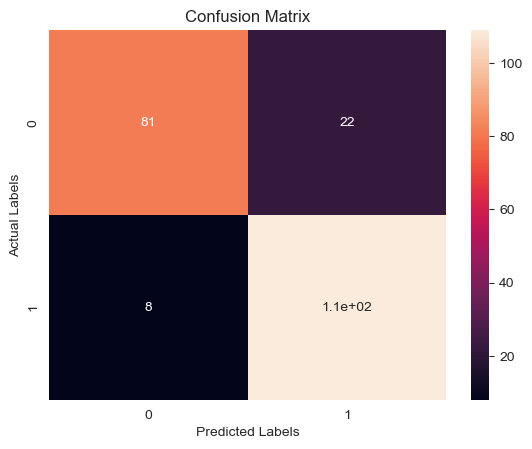

In [105]:
gdb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_depth=1, random_state=42)
gdb_clf.fit(X_train, Y_train)
print("model-Gradient Boosting Classifier")

accuracy = gdb_clf.score(X_train, Y_train)
print("Train Accuracy:", accuracy)

accuracy = gdb_clf.score(X_test, Y_test)
print("Test Accuracy:", accuracy)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## XGBClassifier

model- XGB Classifier
Train Accuracy: 0.969248291571754
Test Accuracy: 0.8681818181818182
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       103
           1       0.88      0.87      0.88       117

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220

[[ 89  14]
 [ 15 102]]


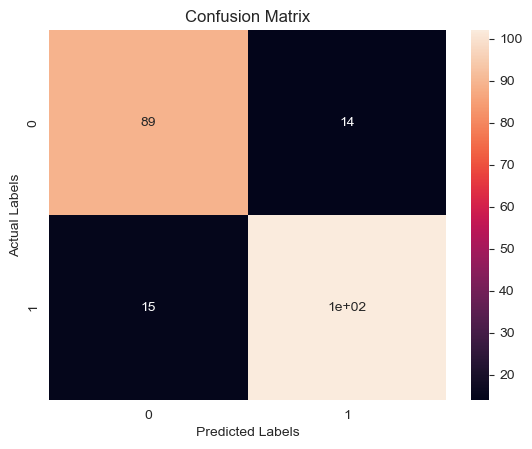

In [106]:
from xgboost import XGBClassifier
xgmodel = XGBClassifier()
xgmodel.fit(X_train, Y_train)


print("model- XGB Classifier")
# Make predictions on the test set
y_pred = xgmodel.predict(X_train)
accuracy = accuracy_score(Y_train, y_pred)
print("Train Accuracy:", accuracy)
# Evaluate the model

# Make predictions on the test set
y_pred = xgmodel.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Test Accuracy:", accuracy)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)